In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import lightgbm as lgb
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [4]:
data_dir = Path('../단국대(사용중)')
feature_dir = Path('../단국대(사용중)')
sub_dir = Path('../단국대(사용중)')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
seed = 42

In [5]:
algo_name = 'lgb'
feature_name = 'feature'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
sub_file = sub_dir / f'{model_name}.csv'

In [6]:
df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
df.head()

(400000, 24)


,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,u_r,u_g,g_r,g_z,g_i,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,,,,,
0,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,4.2545,2.9272,1.3273,3.3972,2.6643,0.9940,0.9961,0.9971,0.9977,0.9982,0.8704,0.8347,1.1210,1.0428,1.0000
1,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,1.5997,0.9902,0.6096,0.8930,0.7935,0.9943,0.9959,0.9970,0.9976,0.9974,0.9451,0.9379,1.0211,1.0077,1.0000
2,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,1.2501,0.9610,0.2891,0.4754,0.4319,0.9894,0.9912,0.9938,0.9953,0.9965,0.9767,0.9751,1.0094,1.0017,1.0000
3,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,5.4395,4.4719,0.9676,1.5541,1.2938,0.9880,0.9908,0.9934,0.9950,0.9960,0.9428,0.9314,1.0272,1.0122,1.3333
4,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,5.4111,3.7543,1.6568,2.7165,2.3750,0.9721,0.9872,0.9906,0.9927,0.9941,0.8902,0.8748,1.0552,1.0176,1.0833


In [7]:
y = df[target_col].values[:320000]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:320000]
tst = df.iloc[320000:]
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(320000,) (320000, 23) (80000, 23)


In [8]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(256000, 23) (64000, 23) (256000,) (64000,)


In [9]:
clf = lgb.LGBMClassifier(objective='multiclass',
                         n_estimators=1000,
                         num_leaves=64,
                         learning_rate=0.1,
                         min_child_samples=10,
                         subsample=.5,
                         subsample_freq=1,
                         colsample_bytree=.8,
                         random_state=seed,
                         n_jobs=-1)
clf.fit(X_trn, y_trn,
        eval_set=[(X_val, y_val)],
        eval_metric='multiclass',
        early_stopping_rounds=10)
p_val = clf.predict(X_val)
p_tst = clf.predict(tst)

[1]	valid_0's multi_logloss: 0.854602
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.746658
[3]	valid_0's multi_logloss: 0.664385
[4]	valid_0's multi_logloss: 0.601286
[5]	valid_0's multi_logloss: 0.543454
[6]	valid_0's multi_logloss: 0.493788
[7]	valid_0's multi_logloss: 0.451593
[8]	valid_0's multi_logloss: 0.415575
[9]	valid_0's multi_logloss: 0.385112
[10]	valid_0's multi_logloss: 0.358917
[11]	valid_0's multi_logloss: 0.336082
[12]	valid_0's multi_logloss: 0.320088
[13]	valid_0's multi_logloss: 0.304803
[14]	valid_0's multi_logloss: 0.29031
[15]	valid_0's multi_logloss: 0.276686
[16]	valid_0's multi_logloss: 0.264677
[17]	valid_0's multi_logloss: 0.25536
[18]	valid_0's multi_logloss: 0.245522
[19]	valid_0's multi_logloss: 0.238824
[20]	valid_0's multi_logloss: 0.231887
[21]	valid_0's multi_logloss: 0.225543
[22]	valid_0's multi_logloss: 0.220131
[23]	valid_0's multi_logloss: 0.215485
[24]	valid_0's multi_logloss: 0.210453
[25]	valid_0's

In [10]:
print(f'{accuracy_score(y_val, p_val) * 100:.4f}%')

93.2938%


<AxesSubplot:ylabel='feature'>

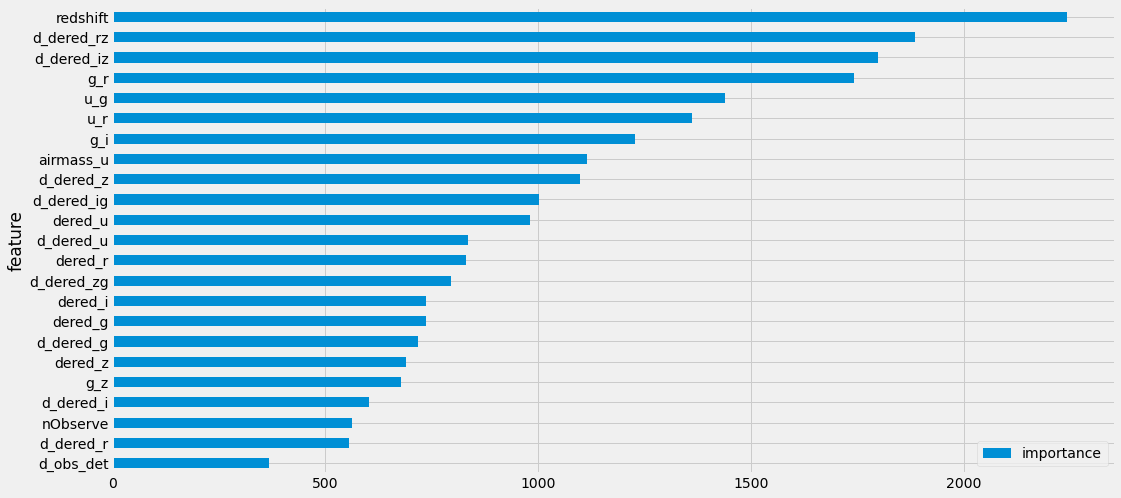

In [11]:
imp = pd.DataFrame({'feature': trn.columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

In [12]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [13]:
sub[target_col] = p_tst
sub.head()

,class
id,
320000,2.0
320001,0.0
320002,2.0
320003,0.0
320004,2.0


In [14]:
sub[target_col].value_counts()

2.0    40849
0.0    29978
1.0     9173
Name: class, dtype: int64

In [15]:
sub.to_csv(sub_file)